# Is it a banger?

In [18]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd
%matplotlib inline

In [19]:
df = pd.read_pickle("../data/processed_dataset.pkl")


In [20]:
def plot_waveforms(audio, log_specgram):
    # audio is np.array holding sample values
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    librosa.display.waveplot(audio, sr=22050)
    plt.subplot(1, 2, 2)
    librosa.display.specshow(log_specgram, x_axis='time',y_axis='log')
    plt.colorbar(format='%+2.0f dB')

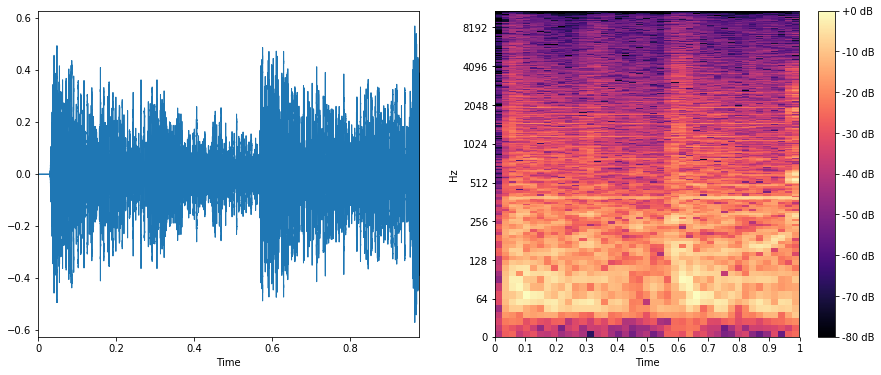

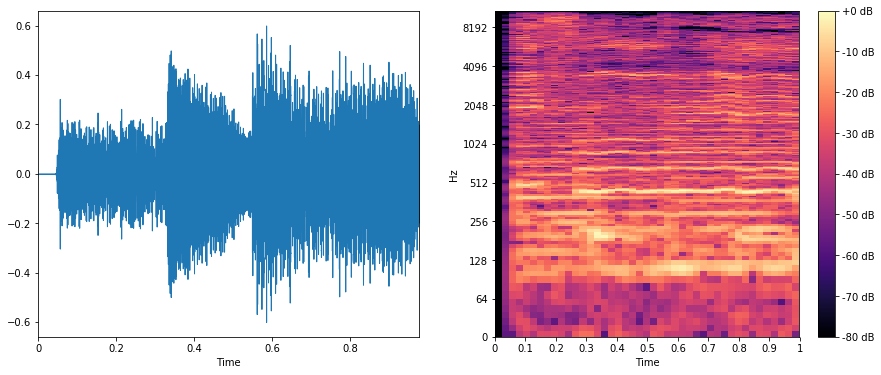

In [21]:
plot_waveforms(df.iloc[1]["audio"], df.iloc[1]["log_specgram"])
plot_waveforms(df.iloc[5]["audio"], df.iloc[4]["log_specgram"])

`log_specgram` has shape `(1025, 215)`. need to work out why. Probably related to number of samples `109750`

In [22]:
log_specgram_shape = df.iloc[0]["log_specgram"].shape

## Establish baseline

In [23]:
print ("This is the error rate if we always guess max{# banger, #not_a_banger}: %.2f" % 
(min(df[df["label"] == "banger"].index.size, df[df["label"] == "not_a_banger"].index.size) / (float)(df.index.size)) )

This is the error rate if we always guess max{# banger, #not_a_banger}: 0.14


## Form the training and testing data sets¶

In [33]:
train_frac = 0.8

def split_train_test(df, train_frac=0.8):
    include = np.random.rand(*df.index.shape)
    is_train = include < train_frac
    train_data = df[is_train]
    test_data = df[~is_train]
    return train_data, test_data
                
train_data, test_data = split_train_test(df, train_frac)

In [34]:
print(train_data.shape)
print(test_data.shape)

(654, 4)
(146, 4)


In [37]:
def export_numpy_features(df):
    x = np.vstack(df["log_specgram"]).reshape(df.shape[0], *log_specgram_shape, 1).astype(np.float32)
    y = np.vstack(df["label_one_hot"])
    return x, y
    
#train_x, train_y = export_numpy_features(train_data)
#test_x, test_y = export_numpy_features(test_data)

for index, row in df.iterrows() :
     print(row['audio'].shape, row['log_specgram'].shape, index)

(21550,) (1025, 43) The Lumineers - Darlene [Lyrics in description]005.wav
(21550,) (1025, 43) Fun. - Some Nights [OFFICIAL VIDEO]027.wav
(21550,) (1025, 43) The Lumineers - 'Submarines' (Official Video)002.wav
(21550,) (1025, 43) The Lumineers - Charlie Boy049.wav
(21550,) (1025, 43) Avicii - Wake Me Up (Official Video)029.wav
(21550,) (1025, 43) The Lumineers - Patience [Lyrics]004.wav
(21550,) (1025, 43) Avicii - Wake Me Up (Official Video)005.wav
(21550,) (1025, 43) Imagine Dragons - Demons (Official)025.wav
(21550,) (1025, 43) Phillip Phillips - Home005.wav
(21550,) (1025, 43) Fun. - We Are Young ft. Janelle Monáe [OFFICIAL VIDEO]038.wav
(21550,) (1025, 43) Bastille - Pompeii032.wav
(21550,) (1025, 43) Gotye - Somebody That I Used To Know (feat. Kimbra) - official video017.wav
(21550,) (1025, 43) Rihanna - Stay ft. Mikky Ekko038.wav
(21550,) (1025, 43) The Lumineers - In The Light [Lyrics]013.wav
(21550,) (1025, 43) The Lumineers - Blue Christmas032.wav
(21550,) (1025, 43) Imagine

(21550,) (1025, 43) The Lumineers - White Lie (lyrics)006.wav
(21550,) (1025, 43) Passenger _ Let Her Go (Official Video)045.wav
(21550,) (1025, 43) Lorde - Royals (US Version)004.wav
(21550,) (1025, 43) Sleep On The Floor (LYRICS) - The Lumineers039.wav
(21550,) (1025, 43) The Lumineers - Gale Song [Lyrics]019.wav
(21550,) (1025, 43) Capital Cities - Safe And Sound (Official Video)033.wav
(21550,) (1025, 43) The Lumineers - Flapper Girl023.wav
(21550,) (1025, 43) Vance Joy - 'Riptide' Official Video010.wav
(21550,) (1025, 43) The Lumineers - Angela004.wav
(21550,) (1025, 43) Fun. - Some Nights [OFFICIAL VIDEO]053.wav
(21550,) (1025, 43) Fun. - We Are Young ft. Janelle Monáe [OFFICIAL VIDEO]001.wav
(21550,) (1025, 43) Of Monsters And Men - Little Talks (Official Video)011.wav
(21550,) (1025, 43) Sleep On The Floor (LYRICS) - The Lumineers015.wav
(21550,) (1025, 43) Fun. - Some Nights [OFFICIAL VIDEO]010.wav
(21550,) (1025, 43) P!nk - Just Give Me A Reason ft. Nate Ruess015.wav
(21550,)

In [30]:
print(validation_x.shape)

NameError: name 'validation_x' is not defined

In [31]:
import tensorflow as tf
tf.set_random_seed(1234)

In [32]:
# This node is where we feed a batch of the training data and labels at each training step
x = tf.placeholder(tf.float32,shape=(None, *log_specgram_shape, 1))
y_ = tf.placeholder(tf.float32, shape=(None, len(df.label.unique())))

# constants for validation and tests
validation_data_node = tf.constant(validation_x)
test_data_node = tf.constant(test_x)

NameError: name 'validation_x' is not defined

In [ ]:
# Weight initialisation functions
 
# small noise for symmetry breaking and non-zero gradients
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# ReLU neurons - initialise with small positive bias to stop 'dead' neurons
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [ ]:
# Convolutions + max pooling

# format: strides = [1, stride, stride, 1]
# W is filter
# input tensor of shape [batch, in_height, in_width, in_channels] 
# and a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]
def conv2d(x, W):  
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# ksize is filter size
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

### First Convolutional Layer
We can now implement our first layer. It will consist of convolution, followed by max pooling. The convolution will compute 32 features for each 5x5 patch. Its weight tensor will have a shape of `[5, 5, 1, 32]`. The first two dimensions are the patch size, the next is the number of input channels, and the last is the number of output channels. We will also have a bias vector with a component for each output channel.

In [ ]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [ ]:
h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [ ]:
h_pool1.shape # check shape

### Second Convolutional Layer

In order to build a deep network, we stack several layers of this type. The second layer will have 16 features for each 5x5 patch.

In [ ]:
W_conv2 = weight_variable([5, 5, 32, 16])
b_conv2 = bias_variable([16])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [ ]:
h_pool2.shape

### TODO Compute shape properly
The image shape is now `(257,54)`



### Densely Connected Layer

Now that the image size has been reduced to `$SHAPE`, we add a fully-connected layer with 256 neurons to allow processing on the entire image. We reshape the tensor from the pooling layer into a batch of vectors, multiply by a weight matrix, add a bias, and apply a ReLU.

In [ ]:
W_fc1 = weight_variable([257 * 54 * 16, 256])
b_fc1 = bias_variable([256])

h_pool2_flat = tf.reshape(h_pool2, [-1, 257*54*16])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [ ]:
h_pool2_flat.shape

### Dropout

To reduce overfitting, we will apply dropout before the readout layer. We create a `placeholder` for the probability that a neuron's output is kept during dropout. This allows us to turn dropout on during training, and turn it off during testing. TensorFlow's `tf.nn.dropout` op automatically handles scaling neuron outputs in addition to masking them, so dropout just works without any additional scaling.

In [ ]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout Layer

Finally, we add a layer, just like for the one layer softmax regression.

In [ ]:
W_fc2 = weight_variable([256, NUM_LABELS])
b_fc2 = bias_variable([NUM_LABELS])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

### Batching function

In [ ]:
def return_batch(df, batch_size=10):
    batch_df = df.sample(batch_size)
    x = np.vstack(batch_df["log_specgram"]).reshape(batch_df.shape[0], *log_specgram_shape, 1).astype(np.float32)
    y = np.vstack(batch_df["label_one_hot"])
    return x, y

### Train and Evaluate the Model

How well does this model do? To train and evaluate it we will use code that is nearly identical to that for the simple one layer SoftMax network above.

The differences are that:

- We will replace the steepest gradient descent optimizer with the more sophisticated ADAM optimizer.
- We will include the additional parameter `keep_prob` in `feed_dict` to control the dropout rate.
- We will add logging to every 100th iteration in the training process.

We will also use `tf.Session` rather than `tf.InteractiveSession`. This better separates the process of creating the graph (model specification) and the process of evaluating the graph (model fitting). It generally makes for cleaner code. The `tf.Session` is created within a with block so that it is automatically destroyed once the block is exited.

Feel free to run this code. Be aware that it does 200 training iterations and may take a while (possibly up to half an hour), depending on your processor.

In [ ]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

BATCH_SIZE = 50
NUM_EPOCHS = 1000

with sess.as_default():
    for i in range(NUM_EPOCHS):
        batch = return_batch(train_data, BATCH_SIZE)
        if i % 1 == 0:
            train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %.2f' % (i, train_accuracy))

        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    
    test_batch = return_batch(test_data, test_data.shape[0])
    test_accuracy = accuracy.eval(feed_dict={
          x: test_batch[0], y_: test_batch[1], keep_prob: 1.0})
    print('test accuracy %.2f' % test_accuracy)